In [1]:
#%pip install transformers
#%pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu128
#%pip install ipywidgets

In [2]:
from transformers import pipeline

# Load the QA pipeline
qa_pipeline = pipeline("question-answering", model="distilbert-base-cased-distilled-squad")

def answer_question(question, context):
    """
    Answers a question based on the given context using a pre-trained QA model.

    Args:
        question (str): The question to be answered.
        context (str): The context in which the question should be answered.

    Returns:
        dict: A dictionary containing the answer and other information.
    """
    result = qa_pipeline(question=question, context=context)
    return result


# Example context
context = """
The phenomenon of why the sky appears blue is primarily due to a process called Rayleigh scattering.
Extractive Question Answering is the task of extracting an answer from a given text. 
An example of a question answering dataset is the SQuAD dataset which is entirely based on that task.
"""

# Example questions
questions = [
    "What is the task of extractive question answering?",
    "Which dataset is entirely based on extractive QA?",
    "Why the sky is blue?"
]

for question in questions:
    print(f"Question: {question}")
    answer = answer_question(question, context)
    print(f"Answer: {answer['answer']}")
    print(f"Score: {answer['score']}\n")



Device set to use cuda:0


Question: What is the task of extractive question answering?
Answer: Extractive Question Answering
Score: 0.8734979629516602

Question: Which dataset is entirely based on extractive QA?
Answer: SQuAD
Score: 0.7672865986824036

Question: Why the sky is blue?
Answer: Rayleigh scattering
Score: 0.6800286173820496



In [3]:
from transformers import pipeline

# Load the sentiment analysis model
model = "distilbert-base-uncased-finetuned-sst-2-english"

# Initialize the sentiment analysis pipeline
sentiment_pipeline = pipeline("sentiment-analysis", model=model)

# Get input from user
text = ""#input("Enter a sentence to analyze: ").strip()

# If no text entered, use a default example
if not text:
    text = "I love this product!"

# Analyze sentiment of the input text
result = sentiment_pipeline(text)

# Display results
print("\nSentiment Analysis Results:")
print(f"Text: {text}")
print(f"Sentiment Label: {result[0]['label']}")
print(f"Confidence Score: {result[0]['score']:.4f}")

# Optional: Add emoji based on sentiment
emoji = "😊" if result[0]['label'] == 'positive' else "😔"
print(f"Emoji Representation: {emoji}")

Device set to use cuda:0



Sentiment Analysis Results:
Text: I love this product!
Sentiment Label: POSITIVE
Confidence Score: 0.9999
Emoji Representation: 😔


In [4]:
#%pip install matplotlib
#%pip install numpy
#%pip install pandas
#%pip install torch
#%pip install git+https://github.com/amazon-science/chronos-forecasting.git
#%pip install accelerate

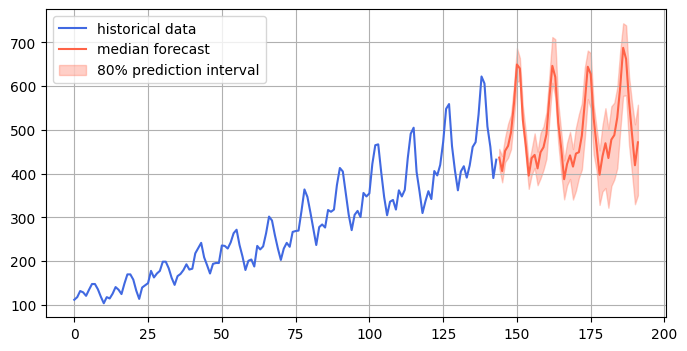

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
from chronos import ChronosPipeline

pipeline = ChronosPipeline.from_pretrained(
  "amazon/chronos-t5-large",
  device_map="cuda",
  torch_dtype=torch.bfloat16,
)

df = pd.read_csv("https://raw.githubusercontent.com/AileenNielsen/TimeSeriesAnalysisWithPython/master/data/AirPassengers.csv")

# context must be either a 1D tensor, a list of 1D tensors,
# or a left-padded 2D tensor with batch as the first dimension
context = torch.tensor(df["#Passengers"])
prediction_length = 48
forecast = pipeline.predict(context, prediction_length)  # shape [num_series, num_samples, prediction_length]

# visualize the forecast
forecast_index = range(len(df), len(df) + prediction_length)
low, median, high = np.quantile(forecast[0].numpy(), [0.1, 0.5, 0.9], axis=0)

plt.figure(figsize=(8, 4))
plt.plot(df["#Passengers"], color="royalblue", label="historical data")
plt.plot(forecast_index, median, color="tomato", label="median forecast")
plt.fill_between(forecast_index, low, high, color="tomato", alpha=0.3, label="80% prediction interval")
plt.legend()
plt.grid()
plt.show()